In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv(r"../data/Combined_dataset.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,cd_account,securities,TransactionFrequency,Recency,AverageTransactionAmount
0,58,management,married,tertiary,no,2143,1,0,unknown,261,1,-1,0,unknown,no,0,0,2.0,25.0,807.50
1,44,technician,single,secondary,no,29,1,0,unknown,151,1,-1,0,unknown,no,0,0,1.0,48.0,60.00
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,76,1,-1,0,unknown,no,0,0,2.0,44.0,995.00
3,35,management,married,tertiary,no,231,1,0,unknown,139,1,-1,0,unknown,no,0,0,1.0,56.0,819.00
4,28,management,single,tertiary,no,447,1,1,unknown,217,1,-1,0,unknown,no,0,0,1.0,54.0,641.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,51,technician,married,tertiary,no,825,0,0,cellular,977,3,-1,0,unknown,yes,0,0,1.0,53.0,215.00
43350,71,retired,divorced,primary,no,1729,0,0,cellular,456,2,-1,0,unknown,yes,0,0,1.0,61.0,5999.00
43351,72,retired,married,secondary,no,5715,0,0,cellular,1127,5,184,3,success,yes,0,0,1.0,36.0,1156.34
43352,57,blue-collar,married,secondary,no,668,0,0,telephone,508,4,-1,0,unknown,no,0,0,1.0,37.0,488.00


In [3]:
# Specify categorical and numerical columns for easier data processing
categorical_cols = ['y', 'job', 'marital', 'education', 'default', 'contact', 'poutcome']
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'TransactionFrequency', 'Recency', 'AverageTransactionAmount', 'housing', 'loan', 'cd_account', 'securities']

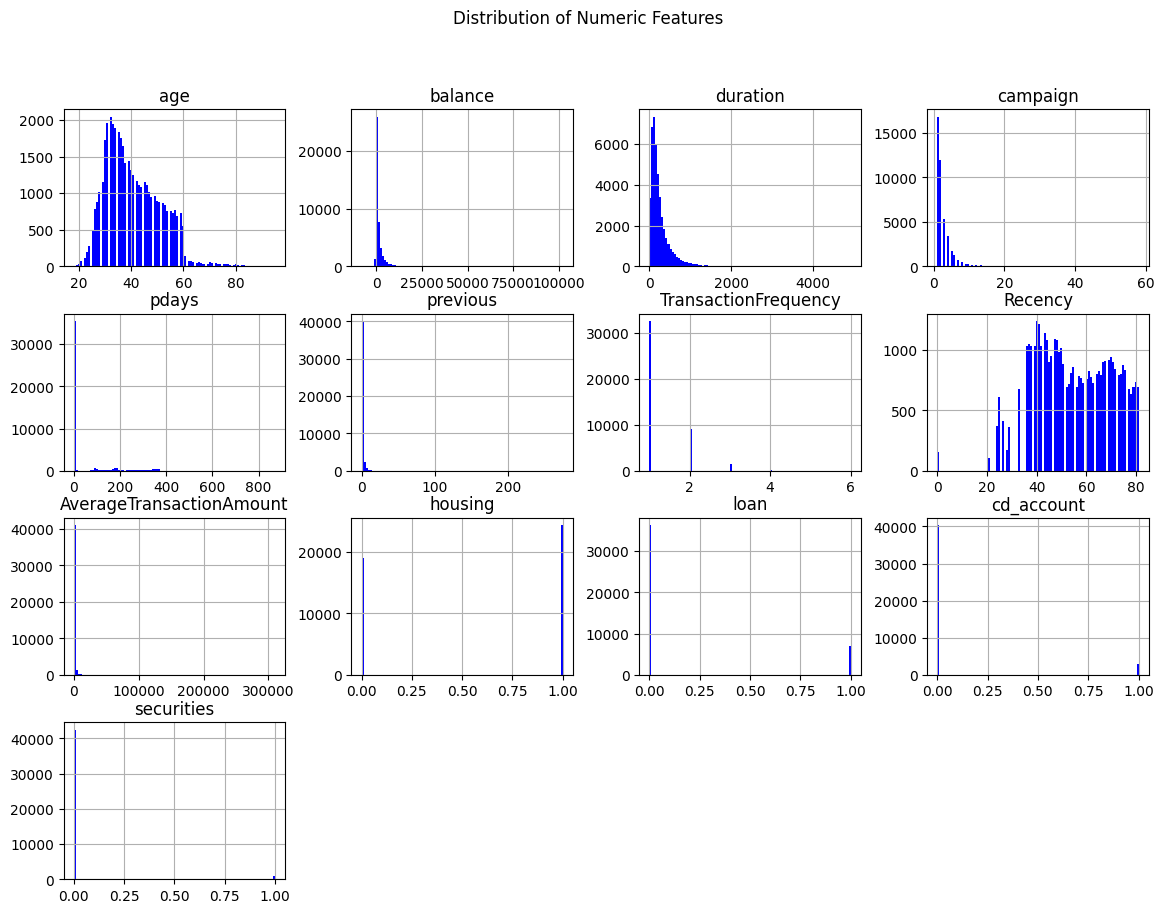

In [4]:
# Plot histograms to show the distribution of each numerical feature in the dataset.
df[numerical_cols].hist(bins=100, figsize=(14, 10), color='blue')
plt.suptitle('Distribution of Numeric Features')
plt.show()

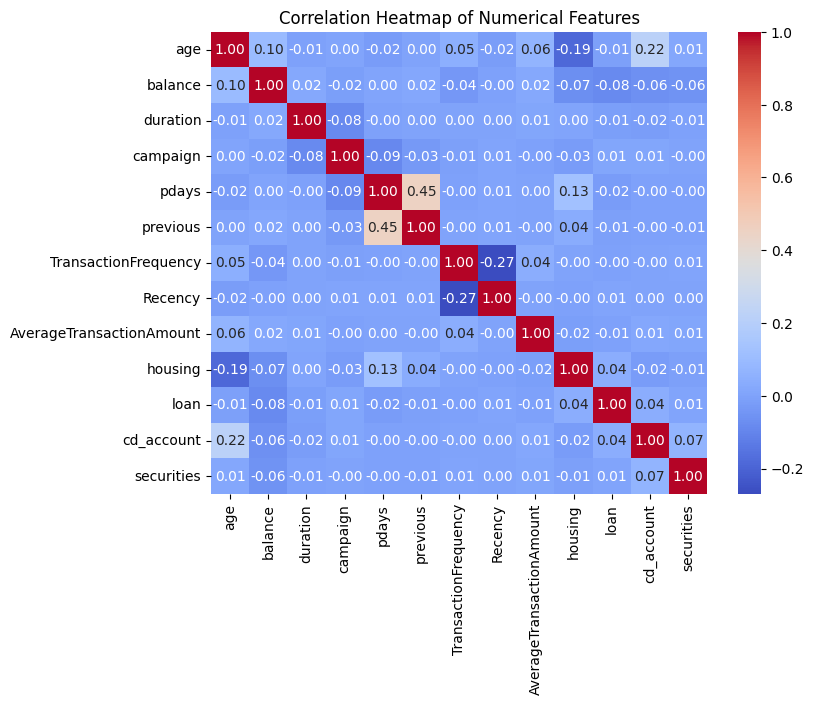

In [5]:
# Create a preprocessor to standardize numerical columns and one-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),    # Apply standard scaling to numerical columns
        ('cat', OneHotEncoder(), categorical_cols)    # Apply one-hot encoding to categorical columns
    ])

# Apply the preprocessor to transform the data and calculate correlations among numerical features
processed_data = preprocessor.fit_transform(df)

# Compute and plot a heatmap of correlations for numerical features to assess relationships
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [6]:
# Create a new DataFrame segment by dropping irrelavent columns
seg1 = df.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'])
seg1

,housing,loan,cd_account,securities,TransactionFrequency,Recency,AverageTransactionAmount
0,1,0,0,0,2.0,25.0,807.50
1,1,0,0,0,1.0,48.0,60.00
2,1,1,0,0,2.0,44.0,995.00
3,1,0,0,0,1.0,56.0,819.00
4,1,1,0,0,1.0,54.0,641.00
...,...,...,...,...,...,...,...
43349,0,0,0,0,1.0,53.0,215.00
43350,0,0,0,0,1.0,61.0,5999.00
43351,0,0,0,0,1.0,36.0,1156.34
43352,0,0,0,0,1.0,37.0,488.00


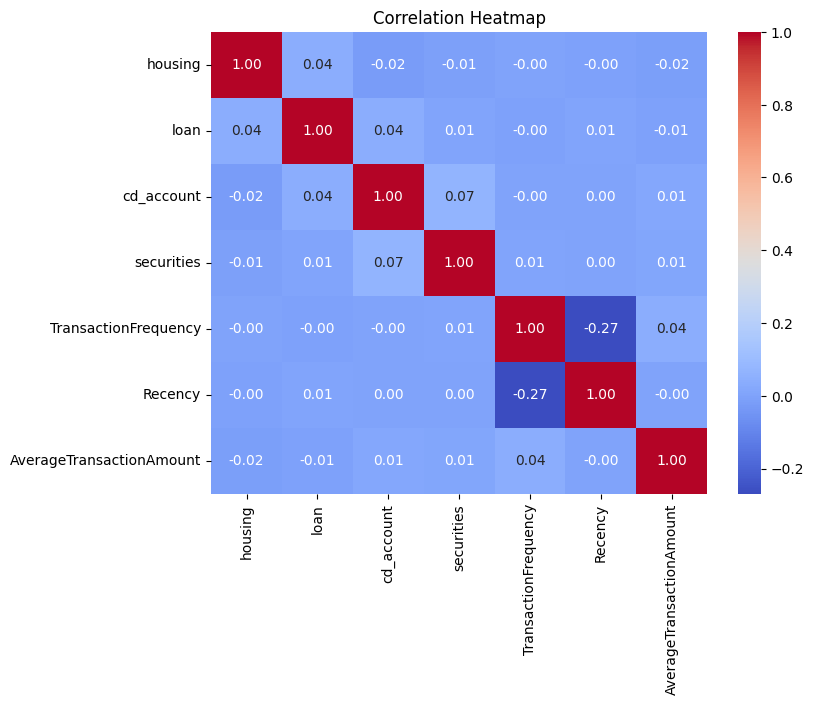

In [7]:
# Compute and plot the correlation heatmap for the original seg1 data (before transformation)
corr_matrix = seg1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

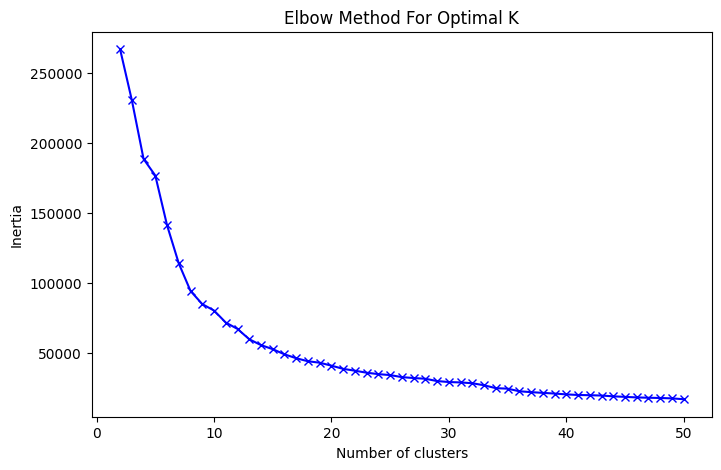

In [55]:
# Define a preprocessor for seg1 with scaling
seg1preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TransactionFrequency', 'Recency', 'AverageTransactionAmount', 'housing', 'loan', 'cd_account', 'securities']),  # Scale specified numerical features
        ('cat', OneHotEncoder(), [])
    ])

# Apply the preprocessor to transform the seg1 data
processed_seg1_data = seg1preprocessor.fit_transform(seg1)

# Initialize an empty list to store the inertia values for different k values
inertia = []

# Define the range of k values (number of clusters) to test
K = range(2, 51)

# Loop through each k value to calculate the inertia
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') 
    kmeans.fit(processed_seg1_data) 
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

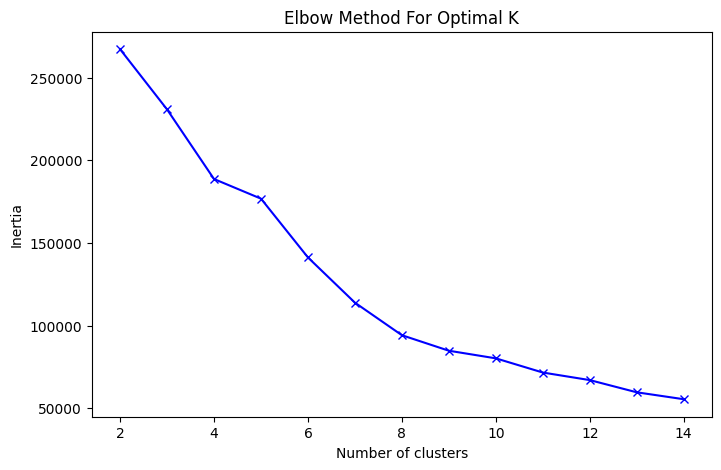

In [57]:
inertia = []

K = range(2, 15)

# Loop through each k value to calculate the inertia
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') 
    kmeans.fit(processed_seg1_data) 
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

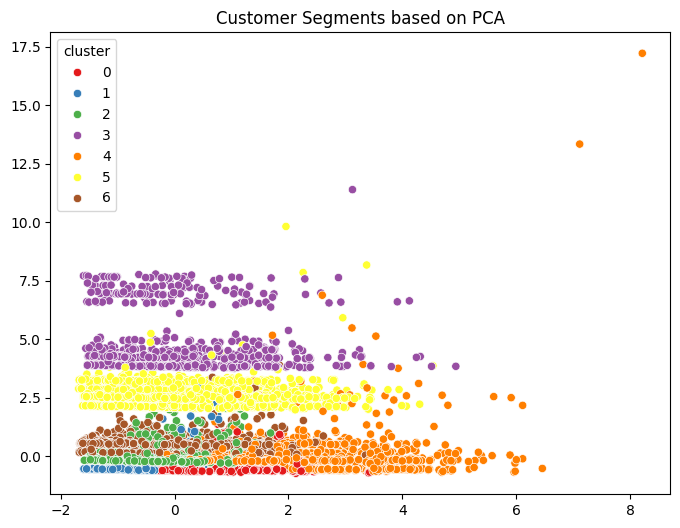

cluster
2    11134
0     8966
1     8743
6     6134
4     4656
5     2883
3      838
Name: count, dtype: int64

In [85]:
# Optimal number of clusters we choose
optimal_clusters = 7

# Initialize the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')

# Apply KMeans to the processed data and assign the predicted clusters to each data point
clusters = kmeans.fit_predict(processed_seg1_data)

# Add the cluster labels as a new column in the original DataFrame
seg1['cluster'] = clusters

# Initialize PCA to reduce the data to 2 principal components for visualization
pca = PCA(n_components=2)

# Apply PCA to the processed seg1 data and reduce it to 2 dimensions
X_pca = pca.fit_transform(processed_seg1_data)

# Create a scatter plot to visualize the customer segments
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=seg1['cluster'], palette='Set1')
plt.title('Customer Segments based on PCA')
plt.show()

# Get the count of data points in each cluster
seg1['cluster'].value_counts()

In [66]:
silhouette_avg = silhouette_score(processed_seg1_data, seg1['cluster'])
print(f"Silhouette Score (without noise): {silhouette_avg}")

Silhouette Score (without noise): 0.3900641282365631


In [ ]:
score = -1
n_comp = -1
ns_keams = []
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    seg1['cluster'] = kmeans.fit_predict(processed_seg1_data)

    silhouette_avg = silhouette_score(processed_seg1_data, seg1['cluster'])
    if score < silhouette_avg:
        score = silhouette_avg
        n_comp = i
    ns_keams.append(silhouette_avg)

print(f"Silhouette Score: {score}")
print(n_comp)

Silhouette Score (without noise): 0.5030227816498265
20


In [51]:
ns_keams

[0.1797834804775183,
 0.26424066413810304,
 0.2877309949091892,
 0.27420538766537,
 0.3228704482368232,
 0.3900641282365631,
 0.3921617129150331,
 0.39840488243114197,
 0.39944592897200526,
 0.42177658994427825,
 0.42106121241853844,
 0.45973209178686664,
 0.4751803432160017,
 0.47173179309519464,
 0.48518348897715935,
 0.4902877436812701,
 0.4939341962175645,
 0.4947719979147082,
 0.5030227816498265]

In [84]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift()
seg1['cluster'] = mean_shift.fit_predict(processed_seg1_data)

silhouette_avg = silhouette_score(processed_seg1_data, seg1['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3713924930964584


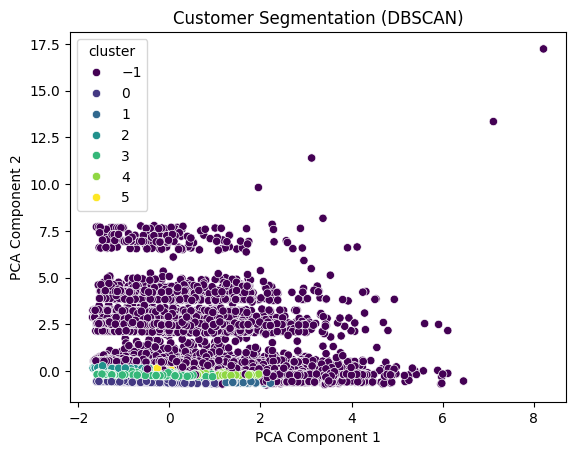

In [62]:
from sklearn.cluster import DBSCAN

X = processed_seg1_data
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=800)
seg1['cluster'] = dbscan.fit_predict(X)

# Visualize clusters
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Customer Segmentation (DBSCAN)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [64]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(processed_seg1_data, seg1['cluster'])
print(f"Silhouette Score (without noise): {silhouette_avg}")

Silhouette Score (without noise): 0.2705085710758799


In [44]:
from sklearn.mixture import GaussianMixture
score = -1
n_comp = -1
ns = []
for i in range(2,21):
    gmm = GaussianMixture(n_components=i, random_state=0)
    seg1['cluster'] = gmm.fit_predict(X)

    silhouette_avg = silhouette_score(processed_seg1_data, seg1['cluster'])
    if score < silhouette_avg:
        score = silhouette_avg
        n_comp = i
    ns.append(silhouette_avg)

print(f"Silhouette Score (without noise): {score}")
print(n_comp)

Silhouette Score (without noise): 0.4256036902057815
9


In [53]:
ns

[0.2418857415065118,
 0.2607624115302498,
 0.27518166133788163,
 0.3211589800136404,
 0.3852974948807069,
 0.38638166943573665,
 0.41500606739962653,
 0.4256036902057815,
 0.25169750835035176,
 0.2849907822822639,
 0.29937078171773907,
 0.3026645364809784,
 0.296957842421395,
 0.2704820544441216,
 0.22363622124242982,
 0.18299742502450897,
 0.1907931084255487,
 0.19754127019354956,
 0.17590714549905068]

In [59]:
seg1['cluster'].value_counts()

cluster
2    11134
0     8966
1     8743
6     6134
4     4656
5     2883
3      838
Name: count, dtype: int64

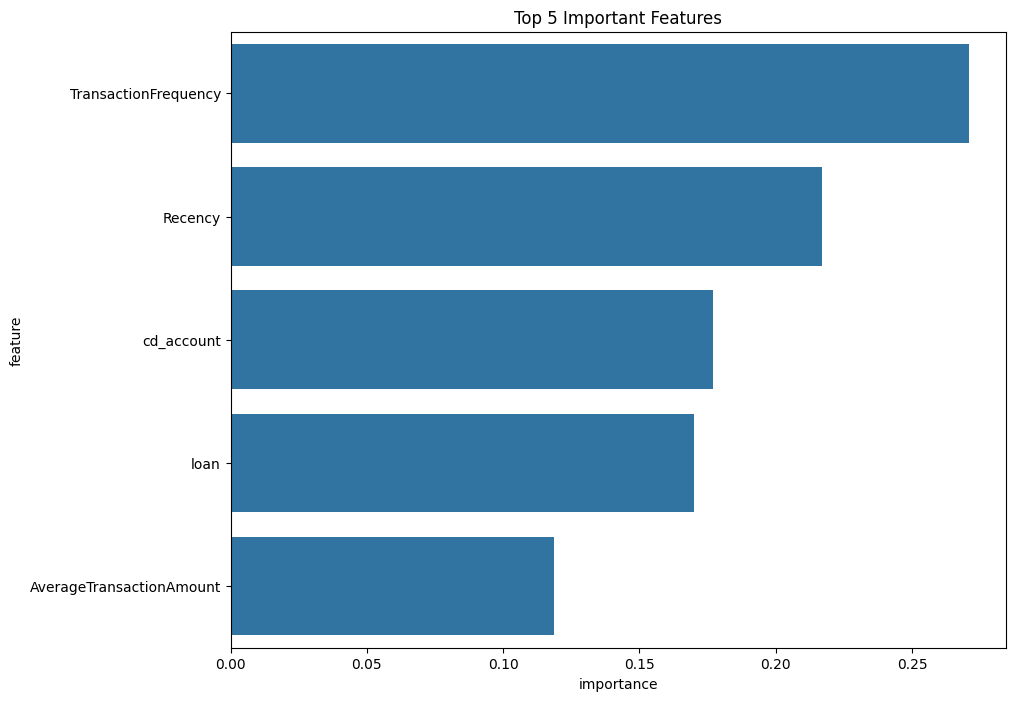

In [67]:
# Trains a Random Forest model to predict customer segments (clusters)
# and visualizes the importance of each feature in determining the cluster assignments.
rf_df = seg1.copy()

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(rf_df.drop(columns='cluster'), rf_df['cluster'])

# Get the feature importances from the trained model
importances = rf.feature_importances_

encoded_feature_names = np.hstack([
    ['TransactionFrequency', 'Recency', 'AverageTransactionAmount', 'housing', 'loan', 'cd_account', 'securities'],
])

feature_importance_df = pd.DataFrame({
    'feature': encoded_feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 5 most important features using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(5))
plt.title('Top 5 Important Features')
plt.show()

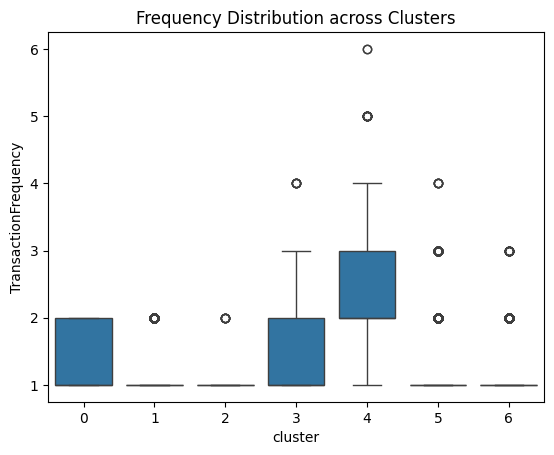

In [68]:
# Visualize the distribution of 'Transaction Frequency' across different clusters
sns.boxplot(x='cluster', y='TransactionFrequency', data=seg1)
plt.title('Frequency Distribution across Clusters')
plt.show()

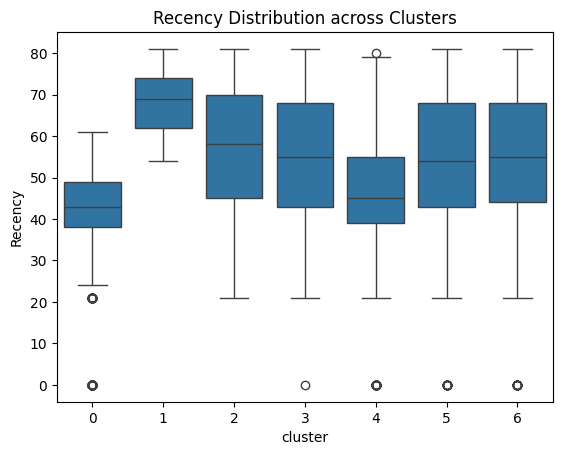

In [69]:
# Visualize the distribution of 'Recency' across different clusters
sns.boxplot(x='cluster', y='Recency', data=seg1)
plt.title('Recency Distribution across Clusters')
plt.show()

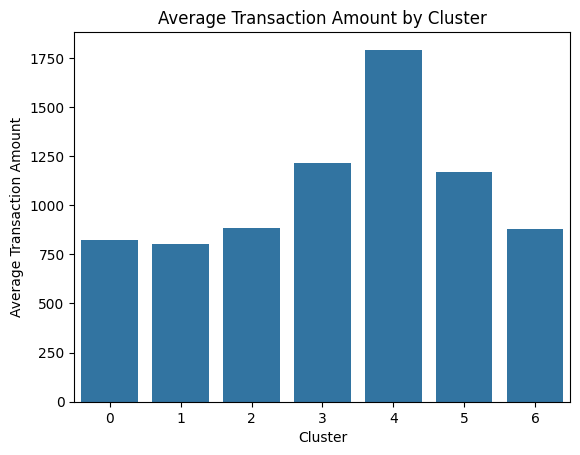

In [72]:
# Visualize the average 'Average Transaction Amount' for each cluster
sns.barplot(data=seg1, x='cluster', y='AverageTransactionAmount', errorbar=None)
plt.title('Average Transaction Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Transaction Amount')
plt.show()

In [73]:
# Save the 'cluster' column got from seg1
df['cluster'] = seg1['cluster']

print('TransactionFrequency', seg1.groupby('cluster')['TransactionFrequency'].mean())
print('AverageTransactionAmount', seg1.groupby('cluster')['AverageTransactionAmount'].mean())
print('Recency', seg1.groupby('cluster')['Recency'].mean())
print('balance', df.groupby('cluster')['balance'].mean())

TransactionFrequency cluster
0    1.346866
1    1.082237
2    1.000629
3    1.313842
4    2.374570
5    1.281651
6    1.222693
Name: TransactionFrequency, dtype: float64
AverageTransactionAmount cluster
0     823.056435
1     800.686527
2     886.684989
3    1217.384552
4    1791.490470
5    1169.189195
6     881.584611
Name: AverageTransactionAmount, dtype: float64
Recency cluster
0    42.480259
1    68.166076
2    57.379738
3    55.177804
4    46.719287
5    54.838363
6    55.599609
Name: Recency, dtype: float64
balance cluster
0    1341.801138
1    1322.813565
2    1932.001976
3     157.033413
4    1376.242053
5     690.587929
6     834.251549
Name: balance, dtype: float64


In [74]:
print('loan', seg1.groupby('cluster')['loan'].mean())
print('cd_account', seg1.groupby('cluster')['cd_account'].mean())
print('housing', seg1.groupby('cluster')['housing'].mean())
print('securities', seg1.groupby('cluster')['securities'].mean())

loan cluster
0    0.000000
1    0.000000
2    0.000000
3    0.181384
4    0.049828
5    0.205689
6    1.000000
Name: loan, dtype: float64
cd_account cluster
0    0.000000
1    0.000000
2    0.000000
3    0.190931
4    0.001503
5    1.000000
6    0.000000
Name: cd_account, dtype: float64
housing cluster
0    0.997769
1    1.000000
2    0.000000
3    0.528640
4    0.199313
5    0.521332
6    0.610858
Name: housing, dtype: float64
securities cluster
0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
Name: securities, dtype: float64


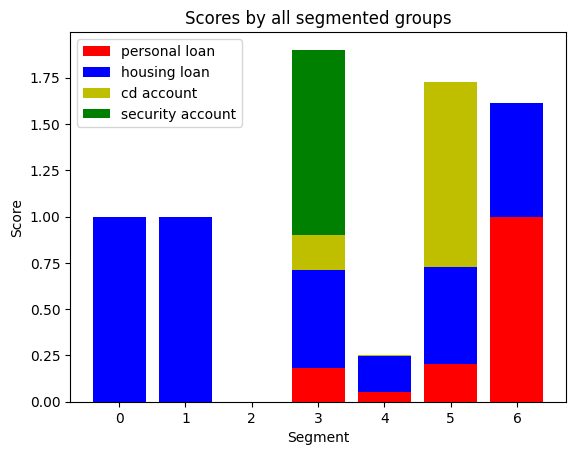

In [76]:
# Visualise the features of each segmented groups
x = ['0', '1', '2', '3', '4', '5', '6']
y1 = seg1.groupby('cluster')['loan'].mean()
y2 = seg1.groupby('cluster')['housing'].mean()
y3 = seg1.groupby('cluster')['cd_account'].mean()
y4 = seg1.groupby('cluster')['securities'].mean()
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Segment")
plt.ylabel("Score")
plt.legend(['personal loan', 'housing loan', 'cd account', 'security account'])
plt.title("Scores by all segmented groups")
plt.show()

In [77]:
# Prepare for prediction
categorical_cols.remove('y')
numerical_cols.append('cluster')

In [185]:
rf_df = df.copy()
rf_df = pd.get_dummies(rf_df, columns=categorical_cols)

X = rf_df.drop(columns='y')
y = rf_df['y'].map({'no': 0, 'yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

Before SMOTE:
y
0    26841
1     3506
Name: count, dtype: int64
After SMOTE:
y
0    26841
1    26841
Name: count, dtype: int64


RandomForestClassifier(random_state=42)

In [158]:
def evaluate_graph(model, X_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Probability predictions for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f'ROC-AUC Score: {roc_auc:.2f}')

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1 Score: 0.89


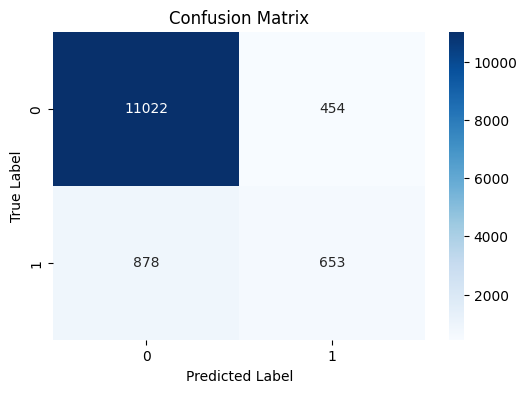

ROC-AUC Score: 0.89


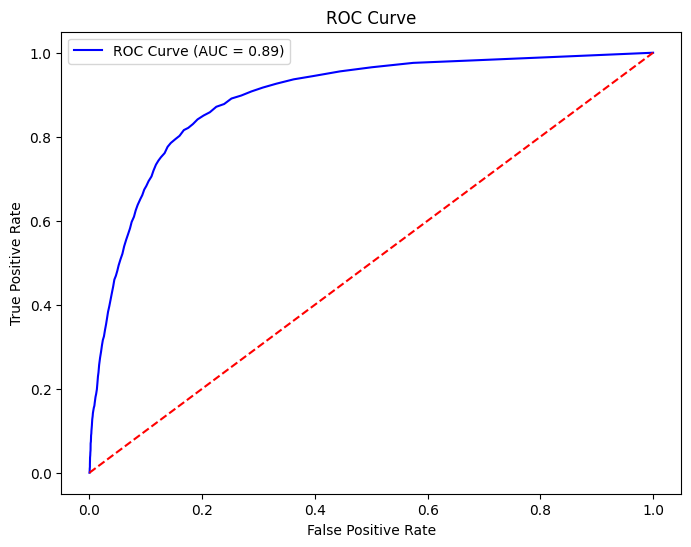

In [186]:
evaluate_graph(rf, X_test)

compare models

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1 Score: 0.89


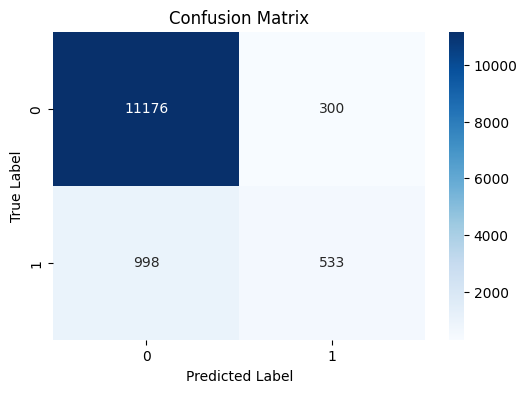

ROC-AUC Score: 0.89


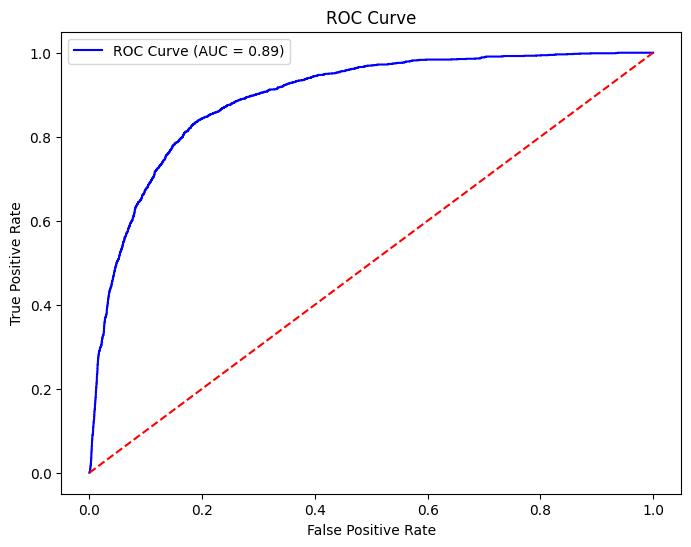

In [ ]:
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

evaluate_graph(log_reg, X_test_scaled)

Accuracy: 0.89
Precision: 0.87
Recall: 0.89
F1 Score: 0.87


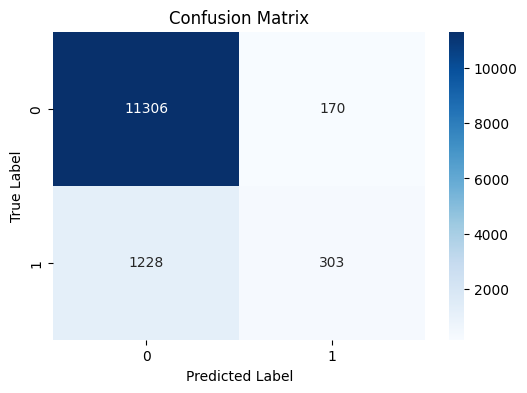

ROC-AUC Score: 0.90


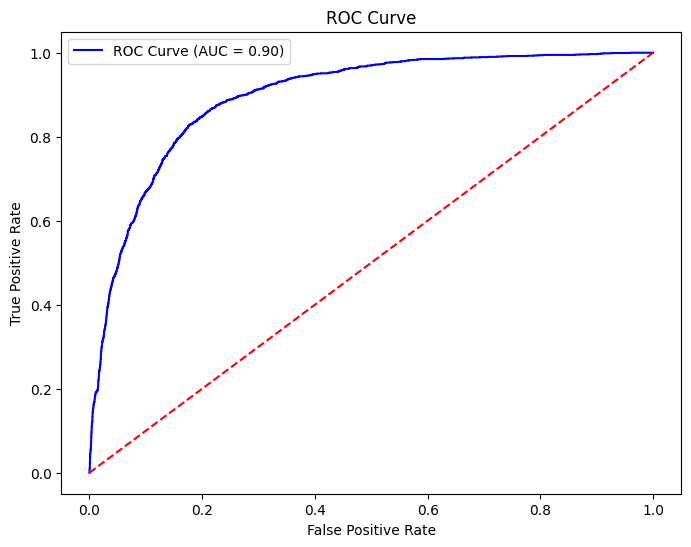

In [155]:
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_resampled_scaled, y_train_resampled)

evaluate_graph(svm, X_test_scaled)

Accuracy: 0.88
Precision: 0.86
Recall: 0.88
F1 Score: 0.87


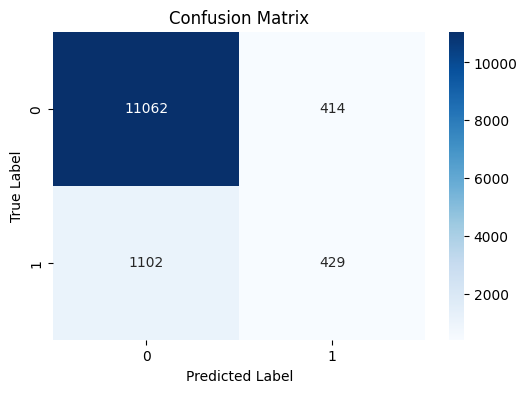

ROC-AUC Score: 0.75


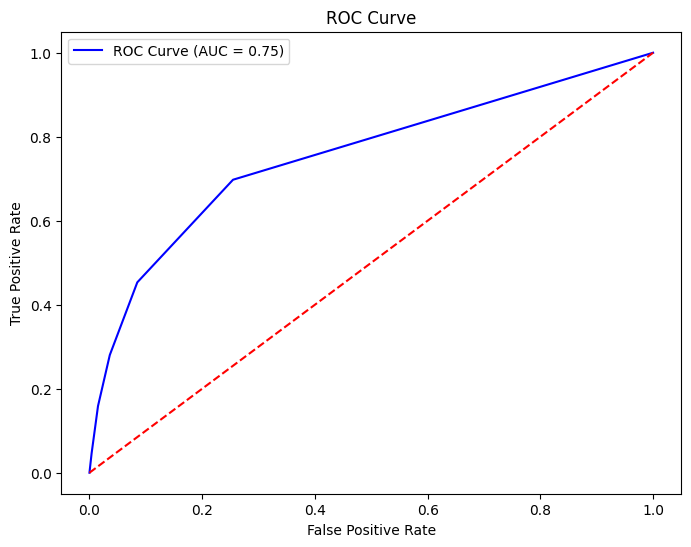

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled_scaled, y_train_resampled)

evaluate_graph(knn, X_test_scaled)

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1 Score: 0.89


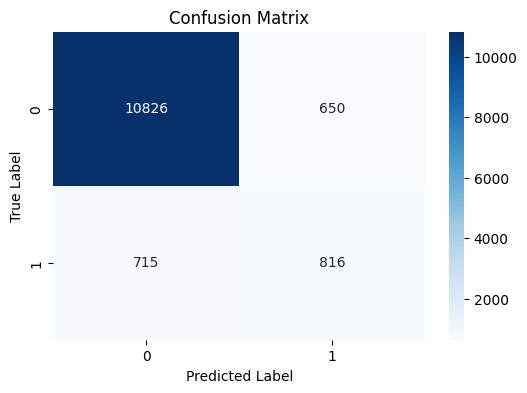

ROC-AUC Score: 0.90


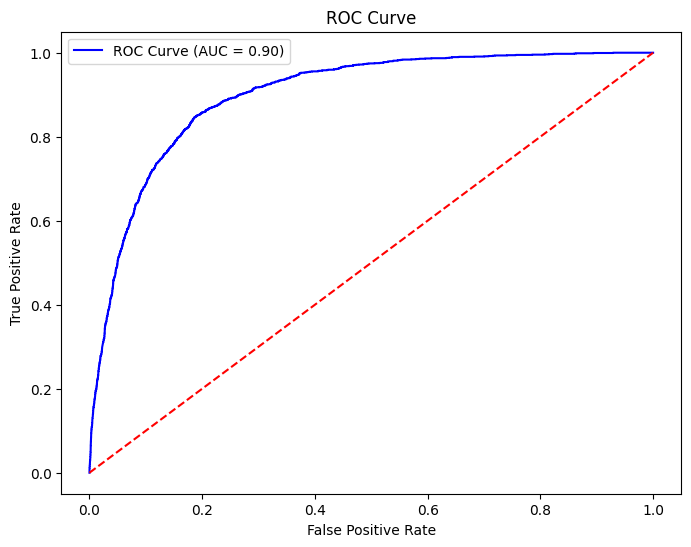

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train_resampled_scaled, y_train_resampled)

evaluate_graph(gbc, X_test_scaled)

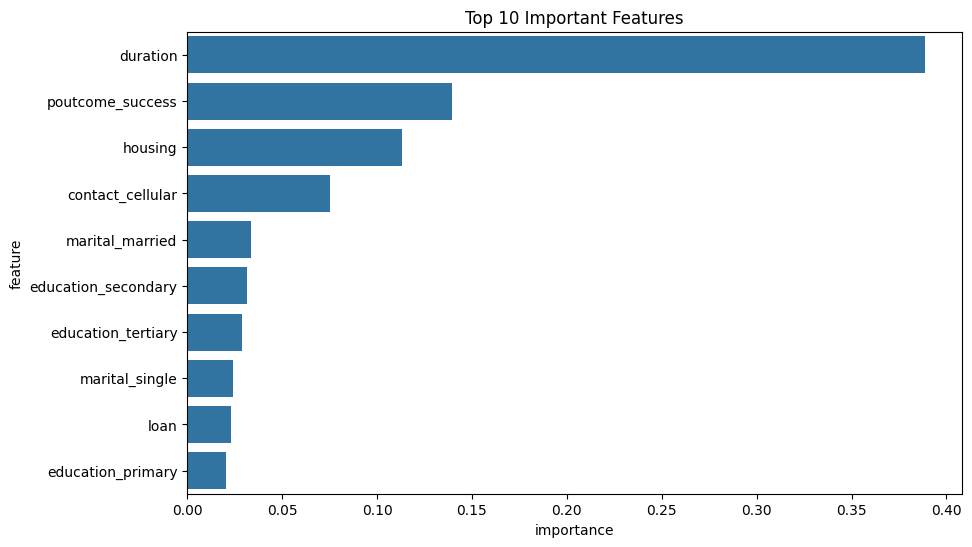

In [167]:
gbc_importance = gbc.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': gbc_importance
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

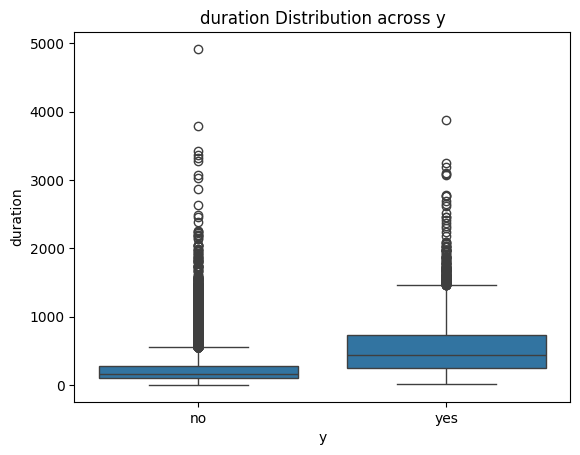

balance y
no     221.028395
yes    540.963669
Name: duration, dtype: float64


In [161]:
# Visualize the distribution of 'balance' across different values of 'y'
sns.boxplot(x='y', y='duration', data=df)
plt.title('duration Distribution across y')
plt.show()
print('balance', df.groupby('y')['duration'].mean())

In [180]:
print('poutcome', df.groupby('y')['poutcome'].value_counts())
print('balance', df.groupby('y')['housing'].mean())

poutcome y    poutcome
no   unknown     32195
     failure      4134
     other        1481
     success       507
yes  unknown      3230
     success       923
     failure       590
     other         294
Name: count, dtype: int64
balance y
no     0.585484
yes    0.372444
Name: housing, dtype: float64


In [178]:
poutcome_counts = df.groupby(['poutcome', 'y']).size().unstack(fill_value=0)
poutcome_counts['success_rate'] = poutcome_counts['yes'] / (poutcome_counts['yes'] + poutcome_counts['no'])
print(poutcome_counts[['yes', 'no', 'success_rate']])

y          yes     no  success_rate
poutcome                           
failure    590   4134      0.124894
other      294   1481      0.165634
success    923    507      0.645455
unknown   3230  32195      0.091179
